In [39]:
import numpy as np
import scipy
import pandas as pd
import networkx as nx

In [4]:
known_genes = pd.read_csv('../data/processed/literature/nature_review_als_genes.csv')
known_genes.head()

,gene_name,pathway,cite
0,SETX,Abbertant RNA metabolism,Hardiman 2017
1,FUS,Abbertant RNA metabolism,Hardiman 2017
2,ANG,Abbertant RNA metabolism,Hardiman 2017
3,TARDBP,Abbertant RNA metabolism,Hardiman 2017
4,ELP3,Abbertant RNA metabolism,Hardiman 2017


In [5]:
gene_name_mapping = pd.read_csv('../../graphgenefinder/hugo_symbol_to_ENSG_mapping.tsv', sep = '\t')
gene_name_mapping.head()

,Ensembl_gene_ID,symbol_origin,any_symbol,Approved_name,n_ensmble_per_symbol
0,ENSG00000110881,Approved_symbol,ASIC1,acid sensing ion channel subunit 1,1
1,ENSG00000117152,Approved_symbol,RGS4,regulator of G protein signaling 4,1
2,ENSG00000143248,Approved_symbol,RGS5,regulator of G protein signaling 5,1
3,ENSG00000182732,Approved_symbol,RGS6,regulator of G protein signaling 6,1
4,ENSG00000182901,Approved_symbol,RGS7,regulator of G protein signaling 7,1


In [6]:
known_genes = known_genes.merge(gene_name_mapping, left_on='gene_name', right_on='any_symbol')
known_genes

,gene_name,pathway,cite,Ensembl_gene_ID,symbol_origin,any_symbol,Approved_name,n_ensmble_per_symbol
0,SETX,Abbertant RNA metabolism,Hardiman 2017,ENSG00000107290,Approved_symbol,SETX,senataxin,1
1,FUS,Abbertant RNA metabolism,Hardiman 2017,ENSG00000089280,Approved_symbol,FUS,FUS RNA binding protein,1
2,FUS,Impaired DNA repair,Hardiman 2017,ENSG00000089280,Approved_symbol,FUS,FUS RNA binding protein,1
3,ANG,Abbertant RNA metabolism,Hardiman 2017,ENSG00000214274,Approved_symbol,ANG,angiogenin,1
4,TARDBP,Abbertant RNA metabolism,Hardiman 2017,ENSG00000120948,Approved_symbol,TARDBP,TAR DNA binding protein,1
5,TARDBP,Oxidative stress,Hardiman 2017,ENSG00000120948,Approved_symbol,TARDBP,TAR DNA binding protein,1
6,TARDBP,Mitochondrial dysfunction,Hardiman 2017,ENSG00000120948,Approved_symbol,TARDBP,TAR DNA binding protein,1
7,ELP3,Abbertant RNA metabolism,Hardiman 2017,ENSG00000134014,Approved_symbol,ELP3,elongator acetyltransferase complex subunit 3,1
8,TAF15,Abbertant RNA metabolism,Hardiman 2017,ENSG00000270647,Approved_symbol,TAF15,TATA-box binding protein associated factor 15,1
9,ATXN2,Abbertant RNA metabolism,Hardiman 2017,ENSG00000204842,Approved_symbol,ATXN2,ataxin 2,1


In [7]:
unique_known_genes = np.unique(known_genes.Ensembl_gene_ID)

In [8]:
len(unique_known_genes)

26

In [10]:
edges = pd.read_csv("/data/nasif12/home_if12/brechtma/Documents/code/ALS/data/common/string_preprocessed.tsv.gz", sep='\t')

In [11]:
edges.head()

,protein1,protein2,neighborhood,fusion,cooccurence,coexpression,experimental,database,textmining,combined_score,gene1,gene2
0,ENSP00000000233,ENSP00000272298,0,0,332,62,181,0,125,490,ENSG00000004059,ENSG00000143933
1,ENSP00000000233,ENSP00000253401,0,0,0,0,186,0,56,198,ENSG00000004059,ENSG00000131089
2,ENSP00000000233,ENSP00000401445,0,0,0,0,159,0,0,159,ENSG00000004059,ENSG00000178607
3,ENSP00000000233,ENSP00000418915,0,0,0,61,158,0,542,606,ENSG00000004059,ENSG00000147889
4,ENSP00000000233,ENSP00000327801,0,0,0,88,78,0,89,167,ENSG00000004059,ENSG00000185624


In [13]:
%%time
string_graph = nx.from_pandas_edgelist(edges, 'gene1', 'gene2', 'combined_score')

CPU times: user 42.7 s, sys: 1.09 s, total: 43.7 s
Wall time: 43.9 s


In [17]:
genes = pd.DataFrame({'gene_id': string_graph.nodes()})

In [31]:
idx_of_seeds = genes[np.isin(genes.gene_id, unique_known_genes)].index

In [42]:
p_restart = 0.3

# init matrix of candidate genes
p_init = np.zeros(len(string_graph.nodes()))

p_init[idx_of_seeds] = 1

# get adjacency matrix and normalize it to obtain transition matrix
adj = nx.to_scipy_sparse_matrix(string_graph, weight='score')
norm_c = scipy.sparse.diags(1/adj.sum(axis=1).A.ravel())
adj = (norm_c @ adj)

# run a few random walk iterations 
p = p_init
for i in range(20):

    p = (1 - p_restart) * adj.T @ p +  p_restart * p_init

In [43]:
genes['score'] = p

In [44]:
genes

,gene_id,score
0,ENSG00000004059,1.902885e-03
1,ENSG00000143933,2.385741e-03
2,ENSG00000131089,6.494701e-04
3,ENSG00000178607,2.977906e-03
4,ENSG00000147889,5.453120e-03
...,...,...
18839,ENSG00000255359,7.433457e-07
18840,ENSG00000255378,4.091841e-06
18841,ENSG00000229924,6.249962e-07
18842,ENSG00000274175,1.996364e-06


In [66]:
genes.to_csv('../data/processed/network_analysis/prob_of_reaching_gene_from_seeds_new.tsv', sep = '\t')

# Comparision to previous run

There are some minor differences in the mapping of string. I think they will not change the overall results. If necessary I can have a look into this.

In [54]:
old_res = pd.read_csv('/s/project/gtex-processed/als/data/processed/network_analysis/prob_of_reaching_gene_from_seeds.tsv', sep = '\t')

In [56]:
old_res

,gene_id,score
0,ENSG00000004059,7.836191e-05
1,ENSG00000143933,9.763296e-05
2,ENSG00000131089,2.687593e-05
3,ENSG00000178607,1.269926e-04
4,ENSG00000147889,2.286763e-04
...,...,...
19032,ENSG00000255359,3.010871e-08
19033,ENSG00000255378,1.612700e-07
19034,ENSG00000229924,2.536740e-08
19035,ENSG00000260286,1.414077e-07


In [61]:
genes.merge(old_res.set_index('gene_id'), left_on= 'gene_id', right_index = True)

,gene_id,score_x,score_y
0,ENSG00000004059,1.902885e-03,7.836191e-05
1,ENSG00000143933,2.385741e-03,9.763296e-05
2,ENSG00000131089,6.494701e-04,2.687593e-05
3,ENSG00000178607,2.977906e-03,1.269926e-04
4,ENSG00000147889,5.453120e-03,2.286763e-04
...,...,...,...
18839,ENSG00000255359,7.433457e-07,3.010871e-08
18840,ENSG00000255378,4.091841e-06,1.612700e-07
18841,ENSG00000229924,6.249962e-07,2.536740e-08
18842,ENSG00000274175,1.996364e-06,4.097878e-08


In [62]:
import plotnine as p9

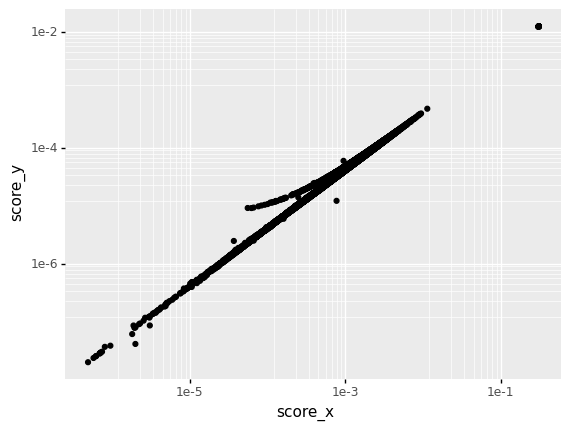

<ggplot: (1458902168468)>

In [63]:
p9.ggplot(genes.merge(old_res.set_index('gene_id'), left_on= 'gene_id', right_index = True), p9.aes('score_x', 'score_y')) + p9.geom_point() + p9.scale_x_log10() + p9.scale_y_log10()